# 노블엠앤비 모델데이터 만들기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import timedelta

## 주가, 시가총액: df_ct_pp

In [82]:
df_ct_pp = pd.read_csv('./data/노블엠앤비_시세추이.csv',encoding='cp949')
df_ct_pp
df_ct_pp['일자'] = pd.to_datetime(df_ct_pp['일자'])
df_ct_pp = df_ct_pp.sort_values(by='일자')
df_ct_pp

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
1474,2016-01-04,10450,250,2.45,10000,10750,10000,672835,6967962350,180337029400,17257132
1473,2016-01-05,11050,600,5.74,10100,11350,10050,864534,9268313550,190691308600,17257132
1472,2016-01-06,12400,1350,12.22,11250,13300,11200,1828806,22040722450,213988436800,17257132
1471,2016-01-07,11000,-1400,-11.29,12800,14000,10900,2261851,28771179200,189828452000,17257132
1470,2016-01-08,11500,500,4.55,11050,12050,10750,1041652,11926285950,198457018000,17257132
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-12-24,3405,40,1.19,3390,3485,3330,61097,208599825,75934111635,22300767
3,2021-12-27,3315,-90,-2.64,3460,3460,3290,52981,176568725,73927042605,22300767
2,2021-12-28,3210,-105,-3.17,3310,3310,2985,252822,790860260,71585462070,22300767
1,2021-12-29,3280,70,2.18,3215,3350,3160,60462,199174815,73146515760,22300767


In [83]:
df_ct_pp = df_ct_pp.set_index('일자')
df_ct_pp1 = df_ct_pp.loc['2016-01':'2021-12']
df_ct_pp.reset_index(inplace=True)

In [84]:
df_ct_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1475 non-null   datetime64[ns]
 1   종가      1475 non-null   int64         
 2   대비      1475 non-null   int64         
 3   등락률     1475 non-null   float64       
 4   시가      1475 non-null   int64         
 5   고가      1475 non-null   int64         
 6   저가      1475 non-null   int64         
 7   거래량     1475 non-null   int64         
 8   거래대금    1475 non-null   int64         
 9   시가총액    1475 non-null   int64         
 10  상장주식수   1475 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 126.9 KB


## 재무비율

In [85]:
df_ct_hts = pd.read_csv('./data/노블엠앤비_hts재무비율.csv',encoding='cp949',index_col=0).T
df_ct_hts = df_ct_hts.loc['2015/12':]
df_ct_hts

,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
2015/12,"10,200",200,-65,-24,-23,"1,618",751,867,86,86.61,...,-11.34,-6.14,-12.18,"-1,316","47,546",0,NaN,3.15,"1,726",0.00
2016/03,"7,150",168,-38,-42,-37,"1,746",694,"1,051",98,66.06,...,-21.98,-10.01,-16.65,"-1,937","51,785",0,NaN,2.03,"1,966",0.00
2016/06,"6,640",165,-30,-102,-98,"1,671",694,977,101,71.05,...,-59.65,-23.96,-41.54,"-4,853","44,764",0,NaN,2.18,"2,028",0.00
2016/09,"5,400",160,-52,-47,-42,"1,590",644,946,103,68.04,...,-26.16,-11.51,-18.53,"-2,020","44,704",0,NaN,1.78,"2,067",0.00
2016/12,"3,615",144,-109,-295,-302,"1,241",561,680,103,82.53,...,-210.10,-83.48,-161.56,"-14,600","29,043",0,NaN,1.83,"2,067",0.00
2017/03,"3,055",142,-44,-49,-47,"1,118",407,712,118,57.16,...,-33.00,-16.48,-30.08,"-2,192","27,467",0,NaN,1.64,"2,360",0.00
2017/06,"2,840",130,-40,-114,-101,"1,033",471,562,118,83.91,...,-78.06,-42.46,-70.29,"-4,293","21,392",0,NaN,1.95,"2,360",0.00
2017/09,"1,610",176,-30,-46,-43,"1,215",546,669,159,81.53,...,-24.46,-16.48,-30.46,"-1,812","19,734",0,NaN,1.20,"3,176",0.00
2017/12,"1,475",155,-48,-52,-50,"1,182",576,605,172,95.18,...,-32.53,-17.27,-33.74,"-1,468","16,553",0,NaN,1.31,"3,434",0.00
2018/03,"1,425",145,-37,-53,-46,"1,145",537,608,172,88.33,...,-31.77,-18.12,-32.17,"-1,345","16,907",0,NaN,1.24,"3,434",0.00


In [86]:
# 제거해주기(적자기업이므로 PER제거)
df_ct_hts.drop(columns= ['유보율(%)','DPS(원)','배당수익률(%)','PER(배)'], inplace=True)

In [87]:
# 인덱스 날짜로 바꿔주기

df_ct_hts = df_ct_hts.reset_index()
df_ct_hts = df_ct_hts.rename(columns={'index':'일자'})
df_ct_hts.head()

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015/12,"10,200",200,-65,-24,-23,"1,618",751,867,86,86.61,-32.70,-11.34,-6.14,-12.18,"-1,316","47,546",3.15,"1,726"
1,2016/03,"7,150",168,-38,-42,-37,"1,746",694,"1,051",98,66.06,-22.32,-21.98,-10.01,-16.65,"-1,937","51,785",2.03,"1,966"
2,2016/06,"6,640",165,-30,-102,-98,"1,671",694,977,101,71.05,-18.26,-59.65,-23.96,-41.54,"-4,853","44,764",2.18,"2,028"
3,2016/09,"5,400",160,-52,-47,-42,"1,590",644,946,103,68.04,-32.47,-26.16,-11.51,-18.53,"-2,020","44,704",1.78,"2,067"
4,2016/12,"3,615",144,-109,-295,-302,"1,241",561,680,103,82.53,-75.75,-210.10,-83.48,-161.56,"-14,600","29,043",1.83,"2,067"


In [88]:
# 데이터타입 날짜형으로 바꿔주기
df_ct_hts['일자'] = pd.to_datetime(df_ct_hts['일자'])

# 데이터타입 숫자형으로 바꿔주기

for col in df_ct_hts.columns[1:]:
        df_ct_hts[col] = df_ct_hts[col].apply(lambda x: x.replace(',',''))
        df_ct_hts[col] = df_ct_hts[col].apply(pd.to_numeric)

In [89]:
df_ct_hts.head(3)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-01,10200,200,-65,-24,-23,1618,751,867,86,86.61,-32.70,-11.34,-6.14,-12.18,-1316,47546,3.15,1726
1,2016-03-01,7150,168,-38,-42,-37,1746,694,1051,98,66.06,-22.32,-21.98,-10.01,-16.65,-1937,51785,2.03,1966
2,2016-06-01,6640,165,-30,-102,-98,1671,694,977,101,71.05,-18.26,-59.65,-23.96,-41.54,-4853,44764,2.18,2028


In [90]:
# 결산일 = 3,6,9,12월 마지막일
df_ct_hts['일자'] = df_ct_hts['일자'].apply(lambda x: x + timedelta(29)) 

In [91]:
df_ct_hts.head(5)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,10200,200,-65,-24,-23,1618,751,867,86,86.61,-32.70,-11.34,-6.14,-12.18,-1316,47546,3.15,1726
1,2016-03-30,7150,168,-38,-42,-37,1746,694,1051,98,66.06,-22.32,-21.98,-10.01,-16.65,-1937,51785,2.03,1966
2,2016-06-30,6640,165,-30,-102,-98,1671,694,977,101,71.05,-18.26,-59.65,-23.96,-41.54,-4853,44764,2.18,2028
3,2016-09-30,5400,160,-52,-47,-42,1590,644,946,103,68.04,-32.47,-26.16,-11.51,-18.53,-2020,44704,1.78,2067
4,2016-12-30,3615,144,-109,-295,-302,1241,561,680,103,82.53,-75.75,-210.10,-83.48,-161.56,-14600,29043,1.83,2067


## 재무비율 날짜 전처리

In [92]:
# '2015-12-01' ~'2022-04-30' 날짜만
ser_date1 = pd.date_range('2015-12-30','2021-12-31')
df_date1 = pd.DataFrame({'일자': ser_date1})
df_date1[:5]

,일자
0,2015-12-30
1,2015-12-31
2,2016-01-01
3,2016-01-02
4,2016-01-03


In [93]:
# 일단 모든 날짜 채우기
df_ct_hts1 = pd.merge(df_date1, df_ct_hts, on='일자', how='left')
df_ct_hts1.head(5)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,10200.0,200.0,-65.0,-24.0,-23.0,1618.0,751.0,867.0,86.0,86.61,-32.7,-11.34,-6.14,-12.18,-1316.0,47546.0,3.15,1726.0
1,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Nan값 의 데이터로 채우기: 발표된 데이터가 과거값

df_ct_hts1 = df_ct_hts1.fillna(method='bfill')
df_ct_hts1

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,10200.0,200.0,-65.0,-24.0,-23.0,1618.0,751.0,867.0,86.0,86.61,-32.70,-11.34,-6.14,-12.18,-1316.0,47546.0,3.15,1726.0
1,2015-12-31,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
2,2016-01-01,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
3,2016-01-02,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
4,2016-01-03,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2021-12-27,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
2190,2021-12-28,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
2191,2021-12-29,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
2192,2021-12-30,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0


## 시가총액 데이터와 합치기

In [106]:
df_ct = pd.merge(df_ct_pp,df_ct_hts1, on='일자', how='left')
df_ct = df_ct.iloc[:1475]
df_ct

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2016-01-04,10450,250,2.45,10000,10750,10000,672835,6967962350,180337029400,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
1,2016-01-05,11050,600,5.74,10100,11350,10050,864534,9268313550,190691308600,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
2,2016-01-06,12400,1350,12.22,11250,13300,11200,1828806,22040722450,213988436800,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
3,2016-01-07,11000,-1400,-11.29,12800,14000,10900,2261851,28771179200,189828452000,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
4,2016-01-08,11500,500,4.55,11050,12050,10750,1041652,11926285950,198457018000,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,3405,40,1.19,3390,3485,3330,61097,208599825,75934111635,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
1471,2021-12-27,3315,-90,-2.64,3460,3460,3290,52981,176568725,73927042605,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
1472,2021-12-28,3210,-105,-3.17,3310,3310,2985,252822,790860260,71585462070,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
1473,2021-12-29,3280,70,2.18,3215,3350,3160,60462,199174815,73146515760,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0


## 캔들차트 모양

In [107]:
# 고가 - 종가
df_ct['고가-종가'] = df_ct['고가'] - df_ct['종가']

# 고가 - 시가
df_ct['고가-시가'] = df_ct['고가'] - df_ct['시가']

# 고가 - 저가
df_ct['고가-저가'] = df_ct['고가'] - df_ct['저가']

# 종가 - 시가
df_ct['종가-시가'] = df_ct['종가'] - df_ct['시가']

# 종가 - 저가
df_ct['종가-저가'] = df_ct['종가'] - df_ct['저가']

# 시가 - 저가
df_ct['시가-저가'] = df_ct['시가'] - df_ct['저가']

## 이동평균선

In [108]:
## 볼

## 전환사채 전환액

## 안쓰는 열 빼기 : df_ct2 

In [109]:
df_ct.columns

Index(['일자', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액',
       '상장주식수', '주가(원)', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)',
       '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)', '영업이익률(%)',
       '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)', 'PBR(배)',
       '발행주식수', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가'],
      dtype='object')

In [110]:
len(df_ct.columns)

35

In [111]:
df_ct2 = df_ct.drop(columns= ['대비', '시가', '고가', '저가', '거래량', '시가총액',
       '상장주식수', '주가(원)', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)',
       '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)','EPS(원)', 'BPS(원)','발행주식수'])
df_ct2

,일자,종가,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가
0,2016-01-04,10450,2.45,6967962350,66.06,-22.32,-21.98,-10.01,-16.65,2.03,300,750,750,450,450,0
1,2016-01-05,11050,5.74,9268313550,66.06,-22.32,-21.98,-10.01,-16.65,2.03,300,1250,1300,950,1000,50
2,2016-01-06,12400,12.22,22040722450,66.06,-22.32,-21.98,-10.01,-16.65,2.03,900,2050,2100,1150,1200,50
3,2016-01-07,11000,-11.29,28771179200,66.06,-22.32,-21.98,-10.01,-16.65,2.03,3000,1200,3100,-1800,100,1900
4,2016-01-08,11500,4.55,11926285950,66.06,-22.32,-21.98,-10.01,-16.65,2.03,550,1000,1300,450,750,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,3405,1.19,208599825,146.52,9.48,13.68,-12.18,-15.18,1.44,80,95,155,15,75,60
1471,2021-12-27,3315,-2.64,176568725,146.52,9.48,13.68,-12.18,-15.18,1.44,145,0,170,-145,25,170
1472,2021-12-28,3210,-3.17,790860260,146.52,9.48,13.68,-12.18,-15.18,1.44,100,0,325,-100,225,325
1473,2021-12-29,3280,2.18,199174815,146.52,9.48,13.68,-12.18,-15.18,1.44,70,135,190,65,120,55


In [112]:
# 거래대금, 전환사채전환총액 -> 억 단위로 바꿔주기

# df_ct2['거래대금'] = df_ct2['거래대금'].apply(lambda x: x/100000000)
# df_ct2['전환사채전환총액'] = df_ct2['전환사채전환총액'].apply(lambda x: x/100000000)

In [113]:
df_ct3 = df_ct2.copy()

In [114]:
df_ct3.to_csv('./data/노블2_변동률전.csv')

## 변동률로 바꾸기

In [115]:
df_ct3 = pd.read_csv('./data/노블2_변동률전.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가
0,2016-01-04,10450,2.45,6967962350,66.06,-22.32,-21.98,-10.01,-16.65,2.03,300,750,750,450,450,0
1,2016-01-05,11050,5.74,9268313550,66.06,-22.32,-21.98,-10.01,-16.65,2.03,300,1250,1300,950,1000,50
2,2016-01-06,12400,12.22,22040722450,66.06,-22.32,-21.98,-10.01,-16.65,2.03,900,2050,2100,1150,1200,50
3,2016-01-07,11000,-11.29,28771179200,66.06,-22.32,-21.98,-10.01,-16.65,2.03,3000,1200,3100,-1800,100,1900
4,2016-01-08,11500,4.55,11926285950,66.06,-22.32,-21.98,-10.01,-16.65,2.03,550,1000,1300,450,750,300


### 거래대금 0값변경

In [116]:
(df_ct3 == 0).sum()

일자               0
종가               0
등락률            109
거래대금            53
부채비율(%)          0
영업이익률(%)         0
지배주주순이익률(%)      0
ROA(%)           0
ROE(%)           0
PBR(배)           0
고가-종가           33
고가-시가          232
고가-저가           53
종가-시가           38
종가-저가           68
시가-저가          162
dtype: int64

In [117]:
df_ct4 = df_ct3[df_ct3['거래대금']!=0]

### 캔들차트 0값변경

(array([790., 234., 107.,  72.,  43.,  31.,  26.,  21.,   8.,  24.,  10.,
          7.,   3.,   3.,   5.,   3.,   3.,   9.,   3.,   1.,   4.,   1.,
          0.,   2.,   2.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.,   41.,   82.,  123.,  164.,  205.,  246.,  287.,  328.,
         369.,  410.,  451.,  492.,  533.,  574.,  615.,  656.,  697.,
         738.,  779.,  820.,  861.,  902.,  943.,  984., 1025., 1066.,
        1107., 1148., 1189., 1230., 1271., 1312., 1353., 1394., 1435.,
        1476., 1517., 1558., 1599., 1640., 1681., 1722., 1763., 1804.,
        1845., 1886., 1927., 1968., 2009., 2050.]),
 <BarContainer object of 50 artists>)

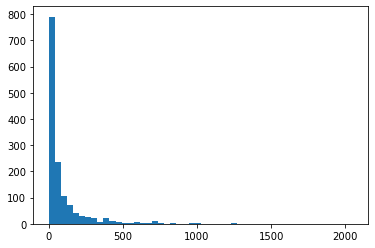

In [118]:
# 0값 -> -1값으로 변경결정
plt.hist(df_ct4['고가-시가'], bins=50)

In [121]:
candle = ['고가-종가','고가-시가','고가-저가','종가-시가','종가-저가','시가-저가']

In [122]:
for can in candle:
    idxs = np.where(df_ct4[can] == 0)
    for idx in idxs:
        df_ct4[can].iloc[idx]= 1    

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 변동률 적용하기

In [123]:
df_ct4.isnull().sum()

일자             0
종가             0
등락률            0
거래대금           0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
dtype: int64

In [124]:
df_ct4.columns

Index(['일자', '종가', '등락률', '거래대금', '부채비율(%)', '영업이익률(%)', '지배주주순이익률(%)',
       'ROA(%)', 'ROE(%)', 'PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가',
       '종가-저가', '시가-저가'],
      dtype='object')

In [126]:
df_ct4.columns[-6:]

Index(['고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가'], dtype='object')

In [127]:
#  '거래대금'
df_ct4.iloc[:,3] = df_ct4.iloc[:,3].pct_change()

# # EPS(원),BPS(원)
# df_ct4.iloc[:,14:16] = df_ct4.iloc[:,14:16].pct_change()

# 고가-종가,고가-시가,고가-저가
df_ct4.iloc[:,-6:] = df_ct4.iloc[:,-6:].pct_change()

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [128]:
df_ct4

,일자,종가,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가
0,2016-01-04,10450,2.45,NaN,66.06,-22.32,-21.98,-10.01,-16.65,2.03,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,11050,5.74,0.330133,66.06,-22.32,-21.98,-10.01,-16.65,2.03,0.000000,0.666667,0.733333,1.111111,1.222222,49.000000
2,2016-01-06,12400,12.22,1.378073,66.06,-22.32,-21.98,-10.01,-16.65,2.03,2.000000,0.640000,0.615385,0.210526,0.200000,0.000000
3,2016-01-07,11000,-11.29,0.305365,66.06,-22.32,-21.98,-10.01,-16.65,2.03,2.333333,-0.414634,0.476190,-2.565217,-0.916667,37.000000
4,2016-01-08,11500,4.55,-0.585478,66.06,-22.32,-21.98,-10.01,-16.65,2.03,-0.816667,-0.166667,-0.580645,-1.250000,6.500000,-0.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,3405,1.19,-0.191021,146.52,9.48,13.68,-12.18,-15.18,1.44,-0.058824,-0.457143,-0.114286,-0.833333,-0.166667,59.000000
1471,2021-12-27,3315,-2.64,-0.153553,146.52,9.48,13.68,-12.18,-15.18,1.44,0.812500,-0.989474,0.096774,-10.666667,-0.666667,1.833333
1472,2021-12-28,3210,-3.17,3.479051,146.52,9.48,13.68,-12.18,-15.18,1.44,-0.310345,0.000000,0.911765,-0.310345,8.000000,0.911765
1473,2021-12-29,3280,2.18,-0.748154,146.52,9.48,13.68,-12.18,-15.18,1.44,-0.300000,134.000000,-0.415385,-1.650000,-0.466667,-0.830769


In [133]:
df_ct4.dropna(inplace=True)

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [134]:
df_ct4.isnull().sum()

일자             0
종가             0
등락률            0
거래대금           0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
dtype: int64

In [135]:
df_ct4.to_csv('./data/노블2_모델데이터.csv')

# 모델구축

In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D

In [137]:
df_ct4 = pd.read_csv('./data/노블엠앤비_모델데이터.csv',index_col=0)
df_ct4.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,0.0
2,2016-01-06,2895,-4.14,0.292444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,0.0
3,2016-01-07,2945,1.73,0.843234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,0.0
4,2016-01-08,2920,-0.85,-0.546023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,0.0
5,2016-01-11,2810,-3.77,-0.349444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,0.0


In [139]:
## 추가전처리
(df_ct4==np.inf).sum()

일자             0
종가             0
등락률            0
거래대금           4
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [140]:
df_ct4 = df_ct4[df_ct4['거래대금']!=np.inf]

## X,Y값 설정

In [141]:
df_ct4.head(2)

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.913043,-0.176471,-0.20,-3.00,8.000000,-0.250000,0.0
2,2016-01-06,2895,-4.14,0.292444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,16.000000,-0.071429,1.25,-2.75,-0.388889,4.333333,0.0


In [142]:
window_size = 20
target_period = 5

X = []
Y = []


for i in range(len(df_ct4) - window_size): 
    
    # 피쳐값 
    X.append([df_ct4.iloc[i+j,3:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct4.iloc[i+j,2] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 5:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [143]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [144]:
X_ary.shape

(1450, 20, 24)

In [145]:
Y1_ary.shape

(1450,)

In [146]:
1444/5

288.8

In [147]:
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

In [155]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## 모델구축

In [170]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(20,24)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               50000     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50,101
Trainable params: 50,101
Non-trainable params: 0
_________________________________________________________________


In [171]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [172]:
model.compile(loss='binary_crossentropy', metrics =['accuracy'], optimizer=Adam)

In [173]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 8ms/step - loss: 0.6208 - accuracy: 0.6909 - val_loss: 0.5884 - val_accuracy: 0.7371
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5786 - accuracy: 0.7064 - val_loss: 0.5769 - val_accuracy: 0.7371
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5613 - accuracy: 0.7136 - val_loss: 0.5721 - val_accuracy: 0.7343
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5481 - accuracy: 0.7200 - val_loss: 0.5718 - val_accuracy: 0.7257
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5366 - accuracy: 0.7264 - val_loss: 0.5723 - val_accuracy: 0.7257
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5256 - accuracy: 0.7400 - val_loss: 0.5708 - val_accuracy: 0.7257
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5151 - accuracy: 0.7436 - val_loss: 0.5731 - val_accuracy: 0.7314
Epoch 

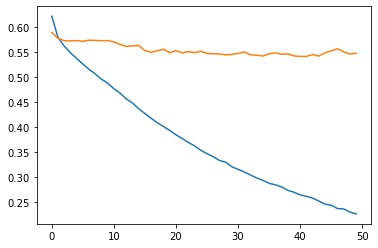

In [174]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

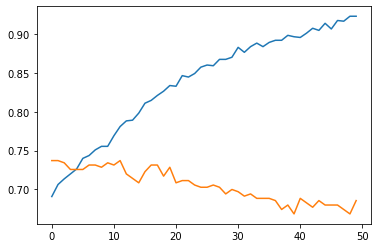

In [175]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
# f1 score

In [186]:
# !pip install tensorflow-addons
import tensorflow_addons as tfa

In [197]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(20,24)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               50000     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50,101
Trainable params: 50,101
Non-trainable params: 0
_________________________________________________________________


In [198]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [199]:
model.compile(loss='binary_crossentropy', metrics =[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], optimizer=Adam)

In [200]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 10ms/step - loss: 0.7709 - precision: 0.3008 - recall: 0.7152 - val_loss: 0.7024 - val_precision: 0.2377 - val_recall: 0.3118
Epoch 2/50
110/110 [==============================] - 1s 7ms/step - loss: 0.6115 - precision: 0.3478 - recall: 0.0991 - val_loss: 0.6399 - val_precision: 0.3704 - val_recall: 0.2151
Epoch 3/50
110/110 [==============================] - 1s 6ms/step - loss: 0.5717 - precision: 0.4571 - recall: 0.0495 - val_loss: 0.6182 - val_precision: 0.4800 - val_recall: 0.1290
Epoch 4/50
110/110 [==============================] - 1s 7ms/step - loss: 0.5533 - precision: 0.5750 - recall: 0.0712 - val_loss: 0.6103 - val_precision: 0.5500 - val_recall: 0.1183
Epoch 5/50
110/110 [==============================] - 1s 6ms/step - loss: 0.5401 - precision: 0.7174 - recall: 0.1022 - val_loss: 0.6034 - val_precision: 0.5000 - val_recall: 0.0753
Epoch 6/50
110/110 [==============================] - 1s 7ms/step - loss: 0.5278 - precis

Epoch 46/50
110/110 [==============================] - 1s 7ms/step - loss: 0.2543 - precision: 0.9104 - recall: 0.7554 - val_loss: 0.6637 - val_precision: 0.2764 - val_recall: 0.3656
Epoch 47/50
110/110 [==============================] - 1s 7ms/step - loss: 0.2490 - precision: 0.8857 - recall: 0.7678 - val_loss: 0.6685 - val_precision: 0.2667 - val_recall: 0.3441
Epoch 48/50
110/110 [==============================] - 1s 6ms/step - loss: 0.2491 - precision: 0.8993 - recall: 0.7740 - val_loss: 0.6821 - val_precision: 0.2868 - val_recall: 0.3978
Epoch 49/50
110/110 [==============================] - 1s 6ms/step - loss: 0.2413 - precision: 0.9011 - recall: 0.7895 - val_loss: 0.6821 - val_precision: 0.2857 - val_recall: 0.4086
Epoch 50/50
110/110 [==============================] - 1s 6ms/step - loss: 0.2379 - precision: 0.8936 - recall: 0.7802 - val_loss: 0.6968 - val_precision: 0.2677 - val_recall: 0.3656


## 모델구축2

In [176]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(20,24)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               50000     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50,101
Trainable params: 50,101
Non-trainable params: 0
_________________________________________________________________


In [177]:
model.compile(loss='binary_crossentropy', metrics =['accuracy'], optimizer='sgd')

In [178]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 8ms/step - loss: 0.5883 - accuracy: 0.7082 - val_loss: 0.5634 - val_accuracy: 0.7343
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5619 - accuracy: 0.7255 - val_loss: 0.5660 - val_accuracy: 0.7343
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5448 - accuracy: 0.7245 - val_loss: 0.5680 - val_accuracy: 0.7343
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5396 - accuracy: 0.7327 - val_loss: 0.5623 - val_accuracy: 0.7343
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5391 - accuracy: 0.7373 - val_loss: 0.5632 - val_accuracy: 0.7314
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5265 - accuracy: 0.7391 - val_loss: 0.5769 - val_accuracy: 0.7343
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5131 - accuracy: 0.7436 - val_loss: 0.5789 - val_accuracy: 0.7314
Epoch 

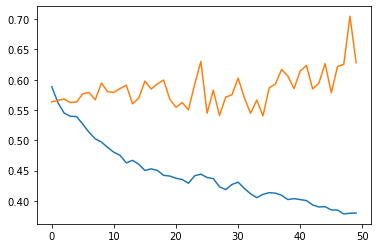

In [179]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

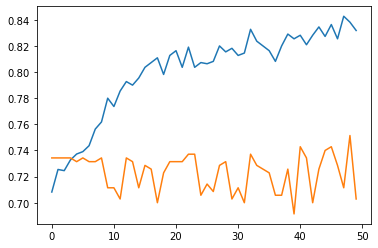

In [180]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])